Q1. Predict how many bike given on rent using bike rent data

Show all these data in graphs

a) bike on rent number is highest in which month

b) Yearly distribution of counts

c) bike on rent number is higher on weekdays or weekends

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [36]:
#Reading the dataset
df=pd.read_csv('../Dataset/bike_rent_data.csv')
df.head()

instant      dteday  season   yr  mnth  holiday  weekday  workingday  \
0        1  01-01-2011       1  0.0   1.0        0      6.0         0.0   
1        2  02-01-2011       1  0.0   1.0        0      0.0         0.0   
2        3  03-01-2011       1  0.0   1.0        0      1.0         1.0   
3        4  04-01-2011       1  0.0   1.0        0      2.0         1.0   
4        5  05-01-2011       1  0.0   1.0        0      3.0         1.0   

   weathersit      temp     atemp       hum  windspeed  casual  registered  \
0           2  0.344167  0.363625  0.805833   0.160446   331.0         654   
1           2  0.363478  0.353739  0.696087   0.248539   131.0         670   
2           1  0.196364  0.189405  0.437273   0.248309   120.0        1229   
3           1  0.200000  0.212122  0.590435   0.160296   108.0        1454   
4           1  0.226957  0.229270  0.436957   0.186900    82.0        1518   

    cnt  
0   985  
1   801  
2  1349  
3  1562  
4  1600

In [37]:
# Check the number of rows and columns in the dataframe
df.shape

(731, 16)

In [38]:
# Check the column-wise info of the dataframe
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     731 non-null    int64  
 1   dteday      728 non-null    object 
 2   season      731 non-null    int64  
 3   yr          730 non-null    float64
 4   mnth        725 non-null    float64
 5   holiday     731 non-null    int64  
 6   weekday     726 non-null    float64
 7   workingday  722 non-null    float64
 8   weathersit  731 non-null    int64  
 9   temp        731 non-null    float64
 10  atemp       722 non-null    float64
 11  hum         731 non-null    float64
 12  windspeed   731 non-null    float64
 13  casual      725 non-null    float64
 14  registered  731 non-null    int64  
 15  cnt         731 non-null    int64  
dtypes: float64(9), int64(6), object(1)
memory usage: 91.5+ KB


In [39]:
# Check the summary for the numeric columns 
df.describe()

instant      season          yr        mnth     holiday     weekday  \
count  731.000000  731.000000  730.000000  725.000000  731.000000  726.000000   
mean   366.000000    2.496580    0.500000    6.565517    0.028728    3.001377   
std    211.165812    1.110807    0.500343    3.429265    0.167155    2.003789   
min      1.000000    1.000000    0.000000    1.000000    0.000000    0.000000   
25%    183.500000    2.000000    0.000000    4.000000    0.000000    1.000000   
50%    366.000000    3.000000    0.500000    7.000000    0.000000    3.000000   
75%    548.500000    3.000000    1.000000   10.000000    0.000000    5.000000   
max    731.000000    4.000000    1.000000   12.000000    1.000000    6.000000   

       workingday  weathersit        temp       atemp         hum   windspeed  \
count  722.000000  731.000000  731.000000  722.000000  731.000000  731.000000   
mean     0.684211    1.395349    0.495385    0.475737    0.627894    0.190486   
std      0.465152    0.544894    0.183051    0.162183    0.142429    0.077498   
min      0.000000    1.000000    0.059130    0.079070    0.000000    0.022392   
25%      0.000000    1.000000    0.337083    0.338368    0.520000    0.134950   
50%      1.000000    1.000000    0.498333    0.488627    0.626667    0.180975   
75%      1.000000    2.000000    0.655417    0.610173    0.730209    0.233214   
max      1.000000    3.000000    0.861667    0.840896    0.972500    0.507463   

            casual   registered          cnt  
count   725.000000   731.000000   731.000000  
mean    843.995862  3656.172367  4504.348837  
std     687.493527  1560.256377  1937.211452  
min       2.000000    20.000000    22.000000  
25%     314.000000  2497.000000  3152.000000  
50%     706.000000  3662.000000  4548.000000  
75%    1081.000000  4776.500000  5956.000000  
max    3410.000000  6946.000000  8714.000000

### EDA

In [40]:
# Column "instant" can be dropped as it simply represents the index
# Column "dteday" can be ignored as output is not based on time series analysis
# Columns casual and registered can be removed, as sum of these two 
#columns is equal to dependent variable cnt

Data_Bike = df.drop(df.columns[[0, 1, 13, 14]], axis = "columns")

print(Data_Bike.shape)

(731, 12)


In [42]:
# Handle missing value

Data_Bike.isnull().sum()

season        0
yr            1
mnth          6
holiday       0
weekday       5
workingday    9
weathersit    0
temp          0
atemp         9
hum           0
windspeed     0
cnt           0
dtype: int64

In [43]:
# fill in missing values with mode
Data_Bike = Data_Bike.fillna(Data_Bike.mode().iloc[0])


In [44]:
# Check NA Values

Data_Bike.isnull().sum()

season        0
yr            0
mnth          0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
cnt           0
dtype: int64

In [45]:
Data_Bike

season   yr  mnth  holiday  weekday  workingday  weathersit      temp  \
0         1  0.0   1.0        0      6.0         0.0           2  0.344167   
1         1  0.0   1.0        0      0.0         0.0           2  0.363478   
2         1  0.0   1.0        0      1.0         1.0           1  0.196364   
3         1  0.0   1.0        0      2.0         1.0           1  0.200000   
4         1  0.0   1.0        0      3.0         1.0           1  0.226957   
..      ...  ...   ...      ...      ...         ...         ...       ...   
726       1  1.0  12.0        0      4.0         1.0           2  0.254167   
727       1  1.0  12.0        0      5.0         1.0           2  0.253333   
728       1  1.0  12.0        0      6.0         0.0           2  0.253333   
729       1  1.0  12.0        0      0.0         0.0           1  0.255833   
730       1  1.0  12.0        0      1.0         1.0           2  0.215833   

        atemp       hum  windspeed   cnt  
0    0.363625  0.805833   0.160446   985  
1    0.353739  0.696087   0.248539   801  
2    0.189405  0.437273   0.248309  1349  
3    0.212122  0.590435   0.160296  1562  
4    0.229270  0.436957   0.186900  1600  
..        ...       ...        ...   ...  
726  0.226642  0.652917   0.350133  2114  
727  0.255046  0.590000   0.155471  3095  
728  0.242400  0.752917   0.124383  1341  
729  0.231700  0.483333   0.350754  1796  
730  0.223487  0.577500   0.154846  2729  

[731 rows x 12 columns]

<AxesSubplot:xlabel='mnth', ylabel='cnt'>

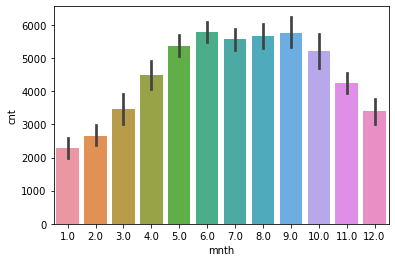

In [47]:
# In whcih month bike on rent number is highest
sns.barplot(x = "mnth", y = "cnt", data=Data_Bike)

#### In Months 6 to 9 has got pretty good count but highest was in month June.

<AxesSubplot:xlabel='yr', ylabel='cnt'>

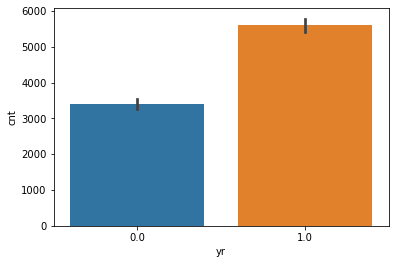

In [49]:
## Yearly distribution of counts

sns.barplot(x = "yr", y = "cnt", data=Data_Bike)

#### Year 2012 has the highest value count

<AxesSubplot:xlabel='weekday', ylabel='cnt'>

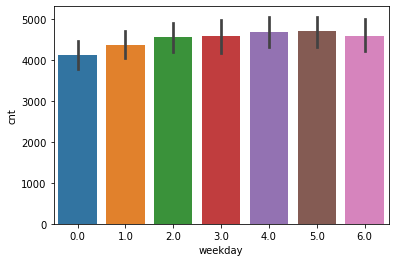

In [54]:
## bike on rent number is higher on weekdays or weekends

sns.barplot(x = "weekday", y = "cnt", data=Data_Bike)

#### On Weekdays bike rent is higher in number

### Model Building

In [55]:
from sklearn.model_selection import train_test_split


X = Data_Bike.drop('cnt',axis=1)
y = Data_Bike['cnt']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30)

In [62]:
from sklearn.linear_model import LinearRegression

lm = LinearRegression()
lm.fit(X_train,y_train)

LinearRegression()

In [63]:
predictions = lm.predict(X_test)

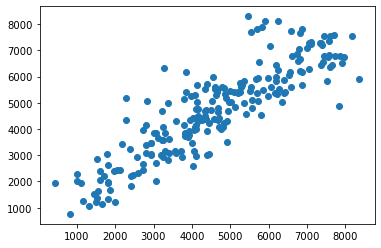

In [67]:
plt.scatter(y_test,predictions)

In [68]:
from sklearn import metrics
from sklearn.metrics import r2_score

In [69]:
print('MAE:', metrics.mean_absolute_error(y_test, predictions))
print('MSE:', metrics.mean_squared_error(y_test, predictions))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, predictions)))
print('R2:', r2_score(y_test,predictions))

MAE: 672.8976907240512
MSE: 821899.8586668213
RMSE: 906.586928356471
R2: 0.756580121811575
